**Imports and Initialization**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

**List of images to process**

In [8]:
image_files = ['img1.png', 'img2.tif', 'img3.tif']
scale_factor = 2

**Core Algorithm Function**

In [9]:
def nearest_neighbor_scratch(img, scale):
    """
    Implements Nearest Neighbor interpolation from scratch.
    Uses inverse mapping to find the closest source pixel.
    """
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    
    # Create empty output array
    # Handling both grayscale (2D) and color (3D) images
    if len(img.shape) == 3:
        output = np.zeros((new_h, new_w, img.shape[2]), dtype=np.uint8)
    else:
        output = np.zeros((new_h, new_w), dtype=np.uint8)

    # Inverse Mapping logic using nested for-loops
    row_ratio = h / new_h
    col_ratio = w / new_w

    for r in range(new_h):
        for c in range(new_w):
            # Find the nearest integer coordinate in source image
            src_r = int(np.floor(r * row_ratio))
            src_c = int(np.floor(c * col_ratio))
            
            # Clip indices to stay within original image bounds
            src_r = min(src_r, h - 1)
            src_c = min(src_c, w - 1)
            
            output[r, c] = img[src_r, src_c]
            
    return output

**Execution, Comparison, and Verification**

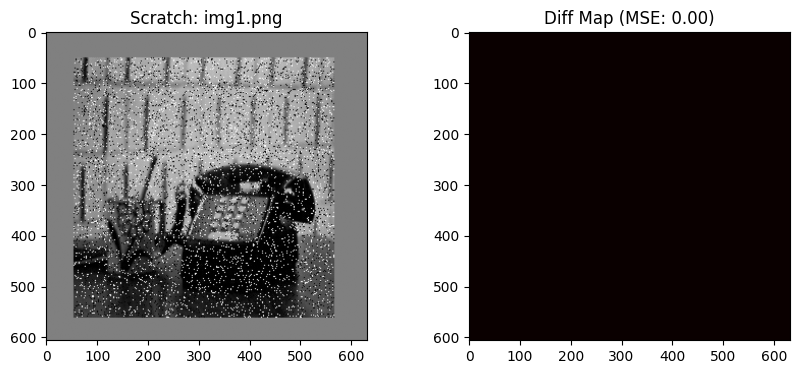

File: img1.png | Time: 2.0681s | MSE: 0.0


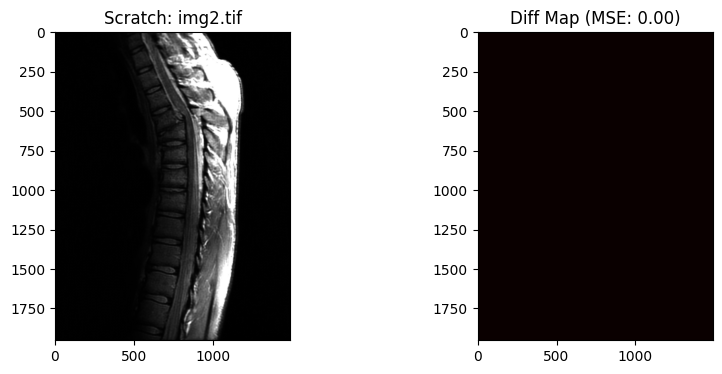

File: img2.tif | Time: 21.0397s | MSE: 0.0


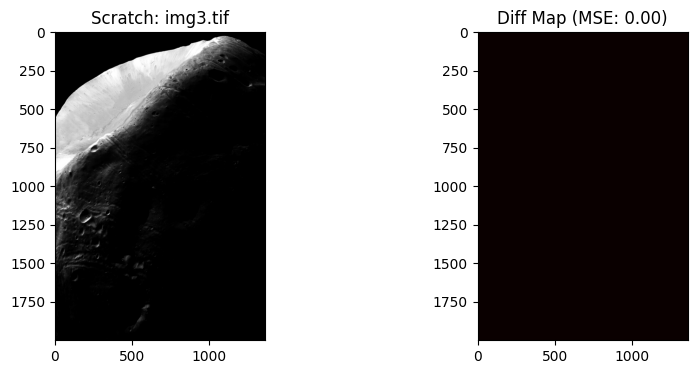

File: img3.tif | Time: 18.3209s | MSE: 0.0


In [10]:
for file in image_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE) # Processing as grayscale for scientific detail
    
    # 1. Run Scratch Implementation
    start = time.time()
    res_scratch = nearest_neighbor_scratch(img, scale_factor)
    scratch_time = time.time() - start
    
    # 2. Run OpenCV implementation for verification
    res_cv2 = cv2.resize(img, (img.shape[1]*scale_factor, img.shape[0]*scale_factor), 
                         interpolation=cv2.INTER_NEAREST)
    
    # 3. Calculate Error (MSE) to verify accuracy
    mse = np.mean((res_scratch.astype(float) - res_cv2.astype(float))**2)
    
    # 4. Plotting Results
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.imshow(res_scratch, cmap='gray'); plt.title(f'Scratch: {file}')
    plt.subplot(1, 2, 2); plt.imshow(np.abs(res_scratch - res_cv2), cmap='hot')
    plt.title(f'Diff Map (MSE: {mse:.2f})')
    plt.show()
    
    print(f"File: {file} | Time: {scratch_time:.4f}s | MSE: {mse}")